# Effect of Handwashing
 Statistical analysis of the effect of handwashing policy on hospital death rates.

In 1840's, Dr. Ignaz Semmelweis noticed the difference in death rates of women giving birth between two of the Vienna General Hospital's clinics:

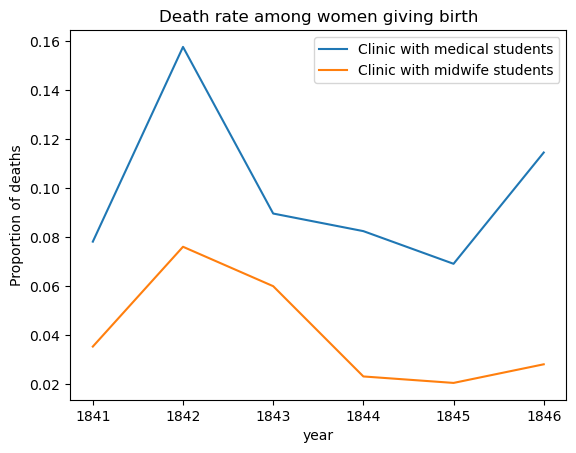

In [7]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt

# This makes plots appear in the notebook
%matplotlib inline

# Compare yearly death rates in 2 clinics

yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']
clinic_1 = yearly[yearly['clinic'] == 'clinic 1']
clinic_2 = yearly[yearly['clinic'] == 'clinic 2']

ax = clinic_1.plot(x='year', y='proportion_deaths', label='Clinic with medical students')
clinic_2.plot(x='year', y='proportion_deaths', label='Clinic with midwife students', ax=ax, ylabel='Proportion of deaths')
ax.set_title('Death rate among women giving birth')
plt.show()

The clinic, in which mostly medical students served, was consistently producing much higher death rates. Dr. 